# Project 7: Implement a scoring model.

*Pierre-Eloi Ragetly*

This project is part of the Data Scientist path proposed by OpenClassrooms.

In [1]:
# File system management
import os

# Get execution time to compare models
import time

# Import numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams.update({'axes.edgecolor': 'white',
                     'axes.facecolor': 'white',
                     'axes.linewidth': 2.0,
                     'figure.facecolor': 'white'})

# Where to save the figures
def save_fig(fig_id, tight_layout=True):
    folder_path = os.path.join("charts")
    if not os.path.isdir(folder_path):
        os.makedirs(folder_path)
    path = os.path.join("charts", fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Get the data</a></span><ul class="toc-item"><li><span><a href="#Read-in-Data" data-toc-modified-id="Read-in-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Read in Data</a></span></li><li><span><a href="#Take-a-quick-look-at-the-main-application-training-and-testing-data" data-toc-modified-id="Take-a-quick-look-at-the-main-application-training-and-testing-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Take a quick look at the main application training and testing data</a></span></li></ul></li><li><span><a href="#Explore-Data" data-toc-modified-id="Explore-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explore Data</a></span><ul class="toc-item"><li><span><a href="#Target-distribution" data-toc-modified-id="Target-distribution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Target distribution</a></span></li><li><span><a href="#Types-of-Attributes" data-toc-modified-id="Types-of-Attributes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Types of Attributes</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Anomalies" data-toc-modified-id="Anomalies-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Anomalies</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Correlations</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Feature engineering</a></span><ul class="toc-item"><li><span><a href="#Polynomial-features" data-toc-modified-id="Polynomial-features-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Polynomial features</a></span></li><li><span><a href="#Domain-knowledge-Features" data-toc-modified-id="Domain-knowledge-Features-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Domain knowledge Features</a></span></li><li><span><a href="#Basic-transformations-of-features" data-toc-modified-id="Basic-transformations-of-features-2.6.3"><span class="toc-item-num">2.6.3&nbsp;&nbsp;</span>Basic transformations of features</a></span></li></ul></li></ul></li><li><span><a href="#Prepare-the-data" data-toc-modified-id="Prepare-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare the data</a></span><ul class="toc-item"><li><span><a href="#Handle-Categorical-features" data-toc-modified-id="Handle-Categorical-features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Handle Categorical features</a></span><ul class="toc-item"><li><span><a href="#Fill-in-missing-values" data-toc-modified-id="Fill-in-missing-values-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Fill in missing values</a></span></li><li><span><a href="#Categorical-features-pipeline" data-toc-modified-id="Categorical-features-pipeline-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Categorical features pipeline</a></span></li></ul></li><li><span><a href="#Handle-numerical-features" data-toc-modified-id="Handle-numerical-features-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Handle numerical features</a></span><ul class="toc-item"><li><span><a href="#Ordinal-features-pipeline" data-toc-modified-id="Ordinal-features-pipeline-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Ordinal features pipeline</a></span></li><li><span><a href="#Sparse-features-pipeline" data-toc-modified-id="Sparse-features-pipeline-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Sparse features pipeline</a></span></li><li><span><a href="#Dense-features-pipeline" data-toc-modified-id="Dense-features-pipeline-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Dense features pipeline</a></span></li></ul></li><li><span><a href="#Transformation-Pipeline" data-toc-modified-id="Transformation-Pipeline-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Transformation Pipeline</a></span></li></ul></li></ul></div>

## Get the data

### Read in Data

In [2]:
# List all files gathering data
list_files = sorted(os.listdir("data/"), key=str.lower)
for i, file in enumerate(list_files):
    print("{}) {}".format(i+1, file))

1) application_test.csv
2) application_train.csv
3) bureau.csv
4) bureau_balance.csv
5) credit_card_balance.csv
6) HomeCredit_columns_description.csv
7) installments_payments.csv
8) POS_CASH_balance.csv
9) previous_application.csv
10) sample_submission.csv


In [3]:
app_test = pd.read_csv("data/" + list_files[0])
app_train = pd.read_csv("data/" + list_files[1])

### Take a quick look at the main application training and testing data

In [4]:
print("Testing data shape: {}".format(app_test.shape))
app_test.head()

Testing data shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Training data shape: {}".format(app_train.shape))
app_train.head()

Training data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
n_test = len(app_test)
n_train = len(app_train)
n_data = n_train + n_test
print("Percentage of data for testing: {:.2%}".format(n_test/n_data))
print("Percentage of data for training: {:.2%}".format(n_train/n_data))

Percentage of data for testing: 13.68%
Percentage of data for training: 86.32%


In [7]:
cols_train = app_train.columns
cols_test = app_test.columns
miss_cols = [col for col in cols_train
             if col not in cols_test]
print("The missing columns in the test set are: ")
for i, col in enumerate(miss_cols):
    print(f"{i+1}) {col}")

The missing columns in the test set are: 
1) TARGET


## Explore Data

In [8]:
df = app_train.copy()

### Target distribution

In [9]:
y = df['TARGET']
print(y.dtype)
y.value_counts()

int64


0    282686
1     24825
Name: TARGET, dtype: int64

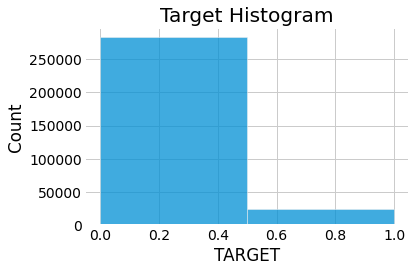

In [10]:
sns.histplot(y, bins=2).set(title="Target Histogram")
save_fig("target_distribution")
plt.show()

In [11]:
n_pos = (y == 1).sum()
n_neg = (y == 0).sum()
n_all = n_pos + n_neg
print("Percentage of data for class 0: {:.2%}".format(n_neg/n_all))
print("Percentage of data for class 1: {:.2%}".format(n_pos/n_all))

Percentage of data for class 0: 91.93%
Percentage of data for class 1: 8.07%


**The dataset is severly imbalanced.** Using a data augmentation technique like SMOTE (Synthetic Minority Oversampling Technique) may significantly improve the model performance.

### Types of Attributes

In [12]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Some attributes have an object type, so they may hold any kind of Python object. However, since we loaded this data from a CSV file, they must be text attributes. Let's check if they are categorical attributes, meaning the number of possible values for each attribute is limited.

In [13]:
app_train.describe(include=np.object).T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


Values are repetitive, and so may be seen as categories. Text attributes are categorical attributes, and so need to be encoded with an ordinal or one-hot encoder.

Moreover, we may have ordinal or even binary attributes among the numerical ones. If that is the case, they must be treated differently than other numerical attributes.  
Let's check binary attributes first

In [14]:
bin_att = [c for c in app_train.select_dtypes(['number'])
           if not app_train[c].nunique() > 2]
print(len(bin_att))
bin_att

33


['TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

The dataset includes many flag attributes, these attributes can take only two values "0" or "1". Scaling data, such as removing the mean value, would destroy the data structure. It would be better to let these features untouched.

Let's now analyse the ordinal features. we will condider as ordinal attributes any attribute with no more than 20 unique values.

In [15]:
ord_att = [c for c in app_train.select_dtypes(['int', 'float'])
           if not app_train[c].nunique() < 3
           and not app_train[c].nunique() > 20]
print(len(ord_att))
ord_att

10


['CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_QRT']

In [16]:
for c in ord_att:
    print(app_train[c].value_counts())

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64
2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64
2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64
0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64
0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0 

Few things might be noticed:

1. three features have supicious instances:
    - `DEF_30_CNT_SOCIAL_CIRCLE`
    - `DEF_60_CNT_SOCIAL_CIRCLE`
    - `AMT_REQ_CREDIT_BUREAU_QRT`     
2. The following features have sparse data
    - `CNT_CHILDREN`
    - `DEF_30_CNT_SOCIAL_CIRCLE`
    - `DEF_60_CNT_SOCIAL_CIRCLE`
    - `AMT_REQ_CREDIT_BUREAU_HOUR`
    - `AMT_REQ_CREDIT_BUREAU_DAY`
    - `AMT_REQ_CREDIT_BUREAU_WEEK` 
    - `AMT_REQ_CREDIT_BUREAU_QRT`   
3. two features are rating with only 3 possible values: 1, 2 and 3
    - `REGION_RATING_CLIENT`  
    - `REGION_RATING_CLIENT_W_CITY`

For point 1), all instances with a value above 10 for the listed features will be filled with not an number (`np.nan`).  
For the features listed in the point 2), we will not apply the common `StandardScaler` but rather the `MaxAbsScaler` to preserve the sparseness structure in the data.  
Features listed in the point 3) will be kept entouched.

### Missing Values

Let's create a function to get the percentage of missing values for each attribute.

In [17]:
def missing_values_table(df):
    """Function to calculate missing values by column."""
    
    # Total missing values
    mis_val = df.isnull().sum()
        
    # Percentage of missing values
    mis_val_percent = (df.isnull().sum() / len(df) * 100).round(1)
        
    # Make a table with the results and
    # sorting the table by percentage of missing descending
    mis_val_table = (pd.concat([mis_val, mis_val_percent], axis=1)
                       .rename(columns={0: 'Missing Values',
                                        1: '% of Total Values'})
                       .query('`Missing Values` != 0')
                       .sort_values('% of Total Values', ascending=False))
        
    # Print some summary information
    print("The selected dataframe has {} columns.".format(df.shape[1]))
    print("There are {} columns that have missing values.".format(len(mis_val_table)))
    # Return the dataframe with missing information
    return mis_val_table

In [18]:
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(10)

The selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
FONDKAPREMONT_MODE,210295,68.4


In [19]:
missing_values.tail(10)

,Missing Values,% of Total Values
NAME_TYPE_SUITE,1292,0.4
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.3
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
DAYS_LAST_PHONE_CHANGE,1,0.0
CNT_FAM_MEMBERS,2,0.0
AMT_ANNUITY,12,0.0


As we can see, most of features have missing values. However, apart for a few exceptions, Machine Learning algorithms cannot run with missing values. We will see how to fix them in the next section : *Prepare the data*.

### Anomalies

After missing valules, the most common problem is anomalies within data. A good way to support anomalies quantitatively is by looking at the statistics of an attibute.

In [20]:
df.describe().T.iloc[:10].round(2)

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.52,102790.18,100002.0,189145.50,278202.00,367142.50,4.562550e+05
TARGET,307511.0,0.08,0.27,0.0,0.00,0.00,0.00,1.000000e+00
CNT_CHILDREN,307511.0,0.42,0.72,0.0,0.00,0.00,1.00,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.92,237123.15,25650.0,112500.00,147150.00,202500.00,1.170000e+08
AMT_CREDIT,307511.0,599026.00,402490.78,45000.0,270000.00,513531.00,808650.00,4.050000e+06
AMT_ANNUITY,307499.0,27108.57,14493.74,1615.5,16524.00,24903.00,34596.00,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.21,369446.46,40500.0,238500.00,450000.00,679500.00,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.02,0.01,0.0,0.01,0.02,0.03,7.000000e-02
DAYS_BIRTH,307511.0,-16037.00,4363.99,-25229.0,-19682.00,-15750.00,-12413.00,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.05,141275.77,-17912.0,-2760.00,-1213.00,-289.00,3.652430e+05


The numbers for the `DAYS_BIRTH` feature are all negative, certainly because they ar recorded relative to the current loan application. Let's see these stats in years.

In [21]:
(df['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Those ages look good, one cannot say as much for the attibute just after : `DAYS_EMPLOYED`.

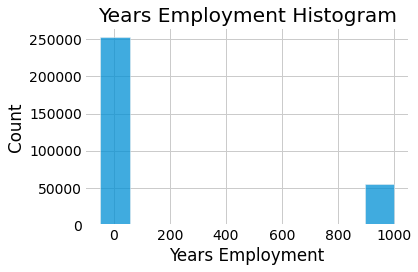

In [22]:
ax = sns.histplot(df['DAYS_EMPLOYED']/365, bins=10)
ax.set(xlabel='Years Employment',
       title='Years Employment Histogram')
save_fig("Years_Employment_distribution")
plt.show()

That does not look right, many values are about 1000 years! Let's subset the anomalous clients and see if they tend to have higher (or lower) rates of default than the rest of the clients.

In [23]:
anom = df[df['DAYS_EMPLOYED'] > 36500]
non_anom = df[df['DAYS_EMPLOYED'] <= 36500]
print(f"The non-anomalies default on {non_anom['TARGET'].mean():.1%} of loans")
print(f"The anomalies default on {anom['TARGET'].mean():.1%} of loans")
print(f"There are {len(anom)} anomalous days of employment")

The non-anomalies default on 8.7% of loans
The anomalies default on 5.4% of loans
There are 55374 anomalous days of employment


It turns out that the anomalies have a lower rate of default and so may have some importance. Let's create a new boolean attribute indicating whether or not the DAYS_EMPLOYED value is anomalous. After that, we will set the anomalies to not a number (`np.nan`).

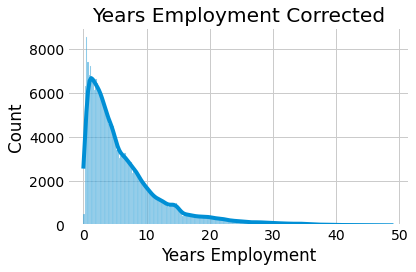

In [24]:
df = (df.assign(DAYS_EMPLOYED_ANOM=lambda x: x.DAYS_EMPLOYED > 36500)
        .assign(DAYS_EMPLOYED_ANOM=lambda x: x.DAYS_EMPLOYED_ANOM.astype(int))
        .assign(DAYS_EMPLOYED=lambda x: x.DAYS_EMPLOYED.where(x.DAYS_EMPLOYED<=36500,
                                                              np.nan)))

ax = sns.histplot(-df['DAYS_EMPLOYED']/365, kde=True)
ax.set(xlabel='Years Employment',
       title='Years Employment Corrected')
save_fig('Years_Employment_distribution_corr')
plt.show()

The distribution looks to be much more in line with what we could expect.
Another feature looks suspiscious: `AMT_INCOME_TOTAL`.  
Let's see the statistics.

In [25]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

The maximum value is above 100,000,000, it is enormous! If it was true, then we can imagine that with such high income, the client did not have any problem to repay the loan.

In [26]:
(df.query('AMT_INCOME_TOTAL > 100_000_000')
   .loc[:, ['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']])

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT
12840,1,117000000.0,562491.0


 It does not look right, the credit amount is very low compare the income, but this client was in default. It is hard to believe. Let's see if we can find other clients like that. 

In [27]:
(df.query('AMT_INCOME_TOTAL > 1_000_000 & TARGET == 1')
   .loc[:, ['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']])

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT
12840,1,117000000.0,562491.0
38271,1,1125000.0,1006920.0
41725,1,1890000.0,781920.0
102626,1,1305000.0,1339884.0
151018,1,1080000.0,371245.5
167656,1,1575000.0,553806.0
173663,1,1350000.0,491211.0
196106,1,1350000.0,2517300.0
234728,1,1350000.0,576072.0
234861,1,1260000.0,1097491.5


It looks ok, the other clients with large income in default contracted a credit quite high compare to their income.  
We will set the first client value to not a number.

### Correlations

Now that we have dealt with the missing values and the outliers let's continue the exploratory data analysis with correlations. A good way to better understand the data is to look at how each attribute correlates with the target by using the `corr()` dataframe method.

In [28]:
# Find correlations with the target and sort
correlations = df.corr()['TARGET'].sort_values(ascending=False)

# Display correlations
print('Most Positive Correlations:\n', correlations.head(10))
print('\nMost Negative Correlations:\n', correlations.tail(10))

Most Positive Correlations:
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
Name: TARGET, dtype: float64

Most Negative Correlations:
 ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED_ANOM           -0.045987
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64


All coefficients are close to 0, meaning there are no strong linear correlations with the target. However, we can notice that:
- as the client gets older, he is less likely to default on his loan.
- Longer the client started his current job, lower is the probability do default
- as the client gets a higher score from external data source (EXT_SOURCE_1 to 3), he is less likely to default on his loan.

Let's continue the analysis with the target and the five attributs with the highest correlation:
- DAYS_BIRTH
- DAYS_EMPLOYED
- EXT_SOURCE_1
- EXT_SOURCE_2
- EXT_SOURCE_3

We are using a heatmap to show the correlations of these features with the target and with each other.

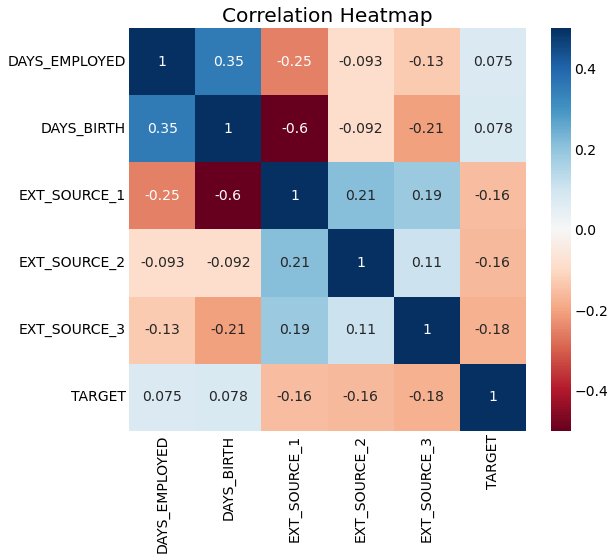

In [29]:
# Extract the EXT_SOURCE variables and show correlations
ext_att = list(correlations.abs().sort_values().tail(6).index)
ext_data_corrs = df[ext_att].corr()

# Heatmap of correlations
plt.figure(figsize = (9, 8))
sns.heatmap(ext_data_corrs, cmap='RdBu', annot = True,
            vmin=-0.5, vmax=0.5)
plt.title('Correlation Heatmap')
save_fig('Correlation_Heatmap')

We can see a strong negative correlation between `DAYS_BIRTH` and `EXT_SOURCE_1` indicating that the former maybe one of the factors used to compute this score.

Let's show a pairplot to finalize the correlation analysis.

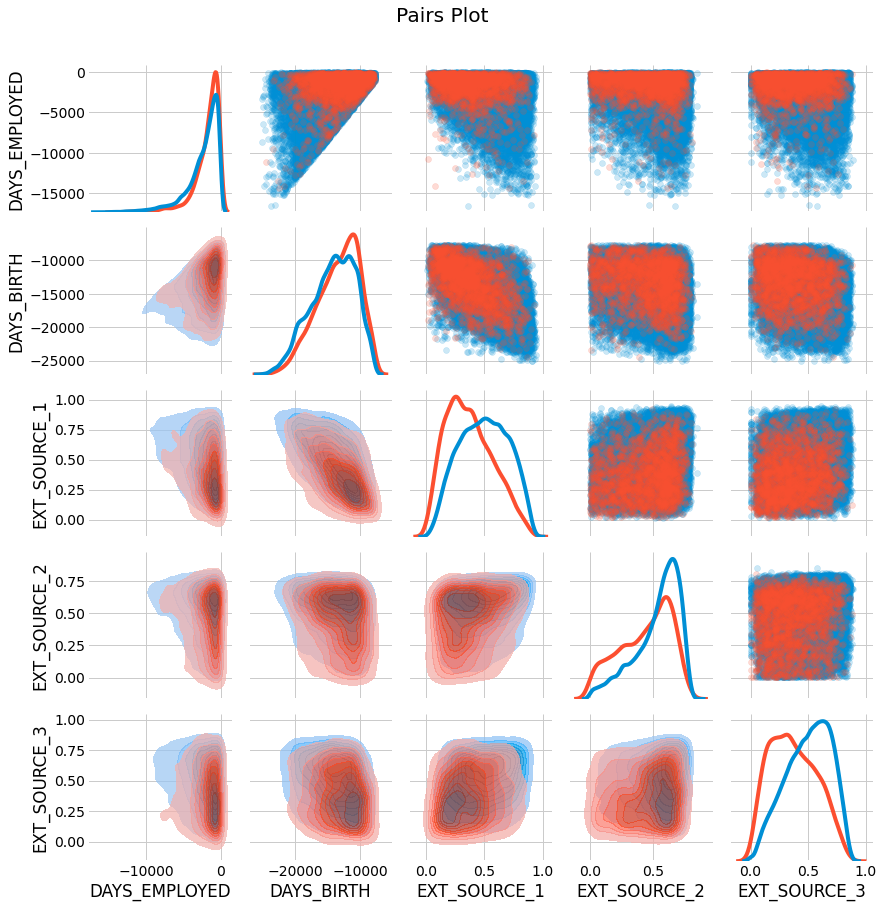

In [30]:
# Create the pairgrid object
# Drop na values and limit to the first 100,000 rows
grid = sns.PairGrid(data=df[ext_att].dropna().loc[:100_000, :],
                    diag_sharey=False, hue='TARGET')
grid.map_upper(plt.scatter, alpha=0.2)
grid.map_diag(sns.kdeplot, common_norm=False)
grid.map_lower(sns.kdeplot, common_norm=False, shade=True, alpha=.7)
plt.suptitle('Pairs Plot', size='x-large', y=1.01)
save_fig('Pairs Plot')
plt.show()

There are few things we can notice:
1. The attributes `DAYS_EMPLOYED`and `EXT_SOURCE_2` have a *tail-heavy* histogram, they extend much farther to the left of the median than to the right.
2. `EXT_SOURCE_1` and `EXT_SOURCE_3` display the biggest difference between the values of the target. These features have clearly some relationship to the likelihood of an applicant to repay a loan.

### Feature engineering

#### Polynomial features

As seen previously, the correlation coefficients (also called Pearson's r) are quite low. That means if there are some relationship between the features and the target, then this one is not linear. We can easily make this relationship more *linear* by using the *Polynomial Features* method. This construction method creates features that are powers of existing features as well as interaction terms between the latters.

In the following code, we create polynomial for the following features only:
- `DAYS_EMPLOYED`
- `DAYS_BIRTH`

In [31]:
poly_att = ['DAYS_EMPLOYED', 'DAYS_BIRTH']

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
                                  
# Need to impute missing values
imputer = SimpleImputer(strategy = 'mean')
X = imputer.fit_transform(df[poly_att])
    
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)

# Transform the features
X_tr = poly_transformer.fit_transform(X)
print(X_tr.shape)

# Create a dataframe of the features
poly_features = pd.DataFrame(X_tr, 
                             columns=poly_transformer.get_feature_names(poly_att))
poly_features['TARGET'] = df['TARGET']

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs)

(307511, 5)
DAYS_BIRTH^2               -0.076672
DAYS_EMPLOYED DAYS_BIRTH   -0.075892
DAYS_EMPLOYED^2            -0.048956
DAYS_EMPLOYED               0.070075
DAYS_BIRTH                  0.078239
TARGET                      1.000000
Name: TARGET, dtype: float64


The correlation is lower with the square, we will not include this step in our pipeline then.

#### Domain knowledge Features

Here I'm going to use five features that were inspired by [this script](https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features?scriptVersionId=6025993) by Aguiar:

- `DAYS_EMPLOYED_PERC`: the percentage of the days employed relative to the client's age
- `INCOME_PER_PERSON`: the client's income relative to the size of the client's family
- `CREDIT_INCOME_PERC`: the percentage of the credit amount relative to a client's income
- `ANNUITY_INCOME_PERC`: the percentage of the loan annuity relative to a client's income
- `CREDIT_TERM`: the length of the payment in years


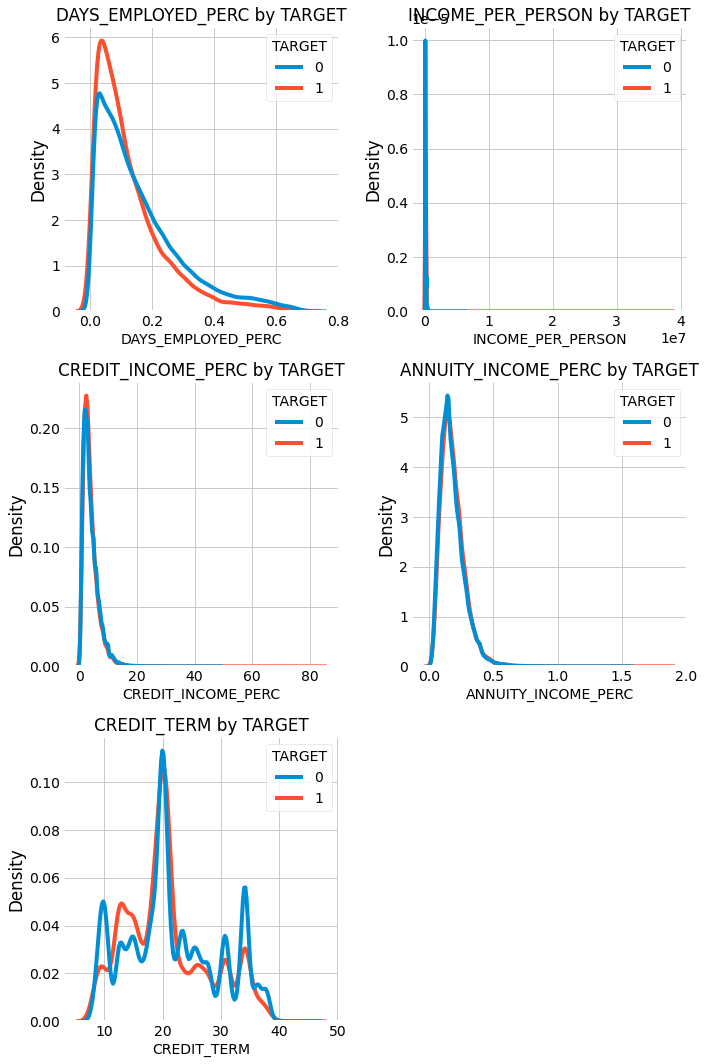

In [33]:
domain_att = ['DAYS_EMPLOYED_PERC',
              'INCOME_PER_PERSON',
              'CREDIT_INCOME_PERC',
              'ANNUITY_INCOME_PERC',
              'CREDIT_TERM']

df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
df['CREDIT_INCOME_PERC'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL'] 
df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['CREDIT_TERM'] =  df['AMT_CREDIT'] / df['AMT_ANNUITY']

# Visualize New Features
size = 10
n_row = (len(domain_att)+1) // 2
plt.figure(figsize=(size, n_row*size/2))
for i, att in enumerate(domain_att):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(data=df, x=att, hue='TARGET', common_norm=False)
    plt.title("{} by TARGET".format(att), fontsize='large')
    plt.xlabel(att, fontsize='medium')
save_fig('domain_attibutes_distributions')
plt.tight_layout()
plt.show()

In [34]:
# Find the correlations with the target
domain_corrs = df[domain_att + ['TARGET']].corr()['TARGET'].sort_values()

# Display correlations
domain_corrs

DAYS_EMPLOYED_PERC    -0.067955
CREDIT_TERM           -0.032102
CREDIT_INCOME_PERC    -0.007727
INCOME_PER_PERSON     -0.006571
ANNUITY_INCOME_PERC    0.014265
TARGET                 1.000000
Name: TARGET, dtype: float64

The Person's correlation factors are pretty low, it is hard to say whether these new features will be useful or not. This will be tested in the fine-tuning section.

#### Basic transformations of features

As said previously, the attributes `DAYS_EMPLOYED`and `EXT_SOURCE_2` have a negative skewness. This may make a bit harder for some Machine Learning algorithms to detect patterns, Let's try to transform them.  
If a positive skewness can be easily corrected by using a log or a square root transformation it is a different story for negative ones. In that case it is better to reflect the data to get a positive skewness before transforming the data. We use the equation bolow to get reflected data:
$$X_{reflected} = 1 + X_{max} - X$$


In [35]:
#reflect the data
def transf_neg_skew_data(data, log=True):
    """Function to transform data with a negative skewness.
    The following workflow is apply:
    1. Reflect the data
    2. Apply the log or the square root on the data reflected
    -----------
    Parameters:
    data: DataFrame
    the pandas object holding the data
    log: bool, default False
    If True use the log transformation otherwise use the square root
    """
    if log:
        return (data.pipe(lambda x: 1 + x.max() - x)
                    .pipe(np.log)
                )
    else:
        return (data.pipe(lambda x: 1 + x.max() - x)
                    .pipe(np.sqrt)
                )

In [36]:
att_to_transf = ['DAYS_EMPLOYED', 'EXT_SOURCE_2']
new_names = [col + "_LOG" for col in att_to_transf]

print("With no transformation:\n",
      df[att_to_transf].skew())
for log in [True, False]:
    print("log = {}:\n".format(log),
          transf_neg_skew_data(df[att_to_transf], log).skew())

With no transformation:
 DAYS_EMPLOYED   -1.968316
EXT_SOURCE_2    -0.793576
dtype: float64
log = True:
 DAYS_EMPLOYED   -0.438516
EXT_SOURCE_2     0.573363
dtype: float64
log = False:
 DAYS_EMPLOYED    0.785716
EXT_SOURCE_2     0.682840
dtype: float64


We get better results with the log transformation.

That concludes the Exploratory Data Analysis (EDA), let's move to the data preparation.

## Prepare the data

### Handle Categorical features

#### Fill in missing values

Let's create two functions to handle missing data.  
1. Drop all attributes with a percentage of missing values higher than a given threhold ($30\%$ by default)
2. Impute missing values for categorical attributes

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

class NaAttFilter(BaseEstimator, TransformerMixin):
    """Drop all attributes with a percentage of missing values higher than na_treshold.

    Parameters:
    -----------
    na_threshold: float, default=0.3
        Control the features to drop
    """
    def __init__(self, na_threshold=.3):
        self.na_threshold = na_threshold
    def fit(self, X, y=None):
        if self.na_threshold > 1:
            self.na_threshold /= 100
        self.na_perc = X.isna().sum() / X.shape[0]
        self.mask_ = self.na_perc > self.na_threshold
        return self
    def transform(self, X):
        return X.loc[:, ~self.mask_]

#### Categorical features pipeline

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Drop the target and the ID of input data
X = app_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)

# Get the categorical attributes
cat_att = X.select_dtypes('object').columns

# Create a pipeline with an encoder
# drop the first category in each feature with two categories (drop='if_binary')
cat_pipeline = Pipeline([
               ('filter', NaAttFilter()),               
               ('imputer', SimpleImputer(strategy='most_frequent')),
               ('encoder', OneHotEncoder(drop='if_binary')),
               ])

In [39]:
X_cat = cat_pipeline.fit_transform(X[cat_att])
X_cat.shape

(307511, 103)

### Handle numerical features

Numerical features will be splitted in 3:
1. Ordinal features: features with less than 6 distinct values
2. Sparse features:
    - with at least 6 distinct values
    - the percentage of 0 value is > 50% 
3. Dense features:
    - with at least 6 distinct values
    - the percentage of 0 value is < 50%

In [40]:
num_att = list(X.select_dtypes('number'))
ord_att = list(X[num_att].loc[:, X[num_att].nunique()<6])
sparse_att = [c for c in num_att
              if c not in ord_att
              and (X[c]==0).sum() > 0.5*len(X)]
dense_att = [c for c in num_att
             if c not in ord_att
             and c not in sparse_att]

#### Ordinal features pipeline

In [41]:
X[ord_att].describe().T

,count,mean,std,min,25%,50%,75%,max
FLAG_MOBIL,307511.0,0.999997,0.001803,0.0,1.0,1.0,1.0,1.0
FLAG_EMP_PHONE,307511.0,0.819889,0.384280,0.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,307511.0,0.199368,0.399526,0.0,0.0,0.0,0.0,1.0
FLAG_CONT_MOBILE,307511.0,0.998133,0.043164,0.0,1.0,1.0,1.0,1.0
FLAG_PHONE,307511.0,0.281066,0.449521,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,307511.0,0.056720,0.231307,0.0,0.0,0.0,0.0,1.0
REGION_RATING_CLIENT,307511.0,2.052463,0.509034,1.0,2.0,2.0,2.0,3.0
REGION_RATING_CLIENT_W_CITY,307511.0,2.031521,0.502737,1.0,2.0,2.0,2.0,3.0
REG_REGION_NOT_LIVE_REGION,307511.0,0.015144,0.122126,0.0,0.0,0.0,0.0,1.0
REG_REGION_NOT_WORK_REGION,307511.0,0.050769,0.219526,0.0,0.0,0.0,0.0,1.0


Values are not spread, no need to scale data.

In [42]:
from sklearn.impute import SimpleImputer

# Pipeline to prepare numerical ordinal features
ord_pipeline = Pipeline([
               ('filter', NaAttFilter()),
               ('imputer', SimpleImputer(strategy='most_frequent')),
               ])

In [43]:
X_ord = ord_pipeline.fit_transform(X[ord_att])
X_ord.shape

(307511, 35)

#### Sparse features pipeline

In [44]:
X[sparse_att].describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
OBS_30_CNT_SOCIAL_CIRCLE,306490.0,1.422245,2.400989,0.0,0.0,0.0,2.0,348.0
DEF_30_CNT_SOCIAL_CIRCLE,306490.0,0.143421,0.446698,0.0,0.0,0.0,0.0,34.0
OBS_60_CNT_SOCIAL_CIRCLE,306490.0,1.405292,2.379803,0.0,0.0,0.0,2.0,344.0
DEF_60_CNT_SOCIAL_CIRCLE,306490.0,0.100049,0.362291,0.0,0.0,0.0,0.0,24.0
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


We saw in the EDA that the following attributes contain few anomalies to be corrected:
- DEF_30_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE
- AMT_REQ_CREDIT_BUREAU_QRT

In [45]:
class SparseCleaner(BaseEstimator, TransformerMixin):
    """Fix anomalies for the following features:
    - DEF_30_CNT_SOCIAL_CIRCLE
    - DEF_60_CNT_SOCIAL_CIRCLE
    - AMT_REQ_CREDIT_BUREAU_QRT
    """
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return (X.assign(DEF_30_CNT_SOCIAL_CIRCLE=lambda x: \
                     x['DEF_30_CNT_SOCIAL_CIRCLE'].where(x['DEF_30_CNT_SOCIAL_CIRCLE']<11,
                                                           np.nan))
                 .assign(DEF_60_CNT_SOCIAL_CIRCLE=lambda x: \
                     x['DEF_60_CNT_SOCIAL_CIRCLE'].where(x['DEF_60_CNT_SOCIAL_CIRCLE']<11,
                                                         np.nan))
                 .assign(AMT_REQ_CREDIT_BUREAU_QRT=lambda x: \
                     x['AMT_REQ_CREDIT_BUREAU_QRT'].where(x['AMT_REQ_CREDIT_BUREAU_QRT']<11,
                                                          np.nan)))      

In [46]:
from sklearn.preprocessing import MaxAbsScaler

# Pipeline to prepare sparse features with at least 6 distinct values
sparse_pipeline = Pipeline([
                  ('filter', NaAttFilter()),
                  ('cleaner', SparseCleaner()),
                  ('imputer', SimpleImputer(strategy='most_frequent')),
                  ('scaler', MaxAbsScaler())
                  ])

In [47]:
X_sparse = sparse_pipeline.fit_transform(X[sparse_att])
X_sparse.shape

(307511, 9)

#### Dense features pipeline

In [48]:
X[dense_att].describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.00000,-19682.000000,-15750.00000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.00000,-2760.000000,-1213.00000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-24672.00000,-7479.500000,-4504.00000,-2010.000000,0.000000e+00
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7197.00000,-4299.000000,-3254.00000,-1720.000000,0.000000e+00
OWN_CAR_AGE,104582.0,12.061091,11.944812,0.00000,5.000000,9.00000,15.000000,9.100000e+01


We saw in the EDA that the following attributes contain few anomalies to be corrected:
- DAYS_EMPLOYED
- AMT_INCOME_TOTAL

Moreover, we will add a boolean column indicating if `DAYS_EMPLOYED` > 36,500 (100 years)

In [49]:
class DenseCleaner(BaseEstimator, TransformerMixin):
    """Function to fix anomalies for the following features:
    - DAYS_EMPLOYED
    - AMT_INCOME_TOTAL
    """ 
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return (X.assign(DAYS_EMPLOYED_ANOM=lambda x: x['DAYS_EMPLOYED'] > 36500)
                 .assign(DAYS_EMPLOYED_ANOM=lambda x: x['DAYS_EMPLOYED_ANOM'].astype(int))
                 .assign(DAYS_EMPLOYED_ANOM=lambda x: x['DAYS_EMPLOYED_ANOM'].fillna(0))
                 .assign(DAYS_EMPLOYED=lambda x: \
                     x['DAYS_EMPLOYED'].where(x['DAYS_EMPLOYED']<36500, np.nan))
                 .assign(AMT_INCOME_TOTAL=lambda x: \
                     x['AMT_INCOME_TOTAL'].where(x['AMT_INCOME_TOTAL']<100_000_000,
                                                 np.nan))) 

We will add also transformers to realize each point described in the Feature Engineering section.

In [50]:
class DomainAdder(BaseEstimator, TransformerMixin):
    """Add five domain Knowledge attributes:
    - DAYS_EMPLOYED_PERC: the percentage of the days employed relative to the client's age
    - CREDIT_INCOME_PERC: the percentage of the credit amount relative to a client's income
    - INCOME_PER_PERSON: the client's income relative to the size of the client's family
    - ANNUITY_INCOME_PERC: the percentage of the loan annuity relative to a client's income
    - CREDIT_TERM: the length of the payment in years
    Parameters:
    -----------
    add_domain_features: bool, default=True
        If False, no domain features are added    
    """
    def __init__(self, add_domain=True):
        self.add_domain = add_domain
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.add_domain:
            return (X.assign(DAYS_EMPLOYED_PERC=lambda x:
                         x['DAYS_EMPLOYED'] / x['DAYS_BIRTH'])
                     .assign(CREDIT_INCOME_PERC=lambda x:
                         x['AMT_CREDIT'] / x['AMT_INCOME_TOTAL'])
                     .assign(INCOME_PER_PERSON=lambda x:
                         x['AMT_INCOME_TOTAL'] / x['CNT_FAM_MEMBERS'])
                     .assign(ANNUITY_INCOME_PERC=lambda x:
                         x['AMT_ANNUITY'] / x['AMT_INCOME_TOTAL'])
                     .assign(CREDIT_TERM=lambda x:
                         x['AMT_CREDIT'] / x['AMT_ANNUITY'])) 
        else:
            return X

In [51]:
class SkewCleaner(BaseEstimator, TransformerMixin):
    """Transform data with an abs(skewness) > threshold
    For data with negative skewness, data are reflected first.
    Parameters:
    -----------
    log: bool, default False
        If True use the log transformation otherwise use the square root
    threshold: float, default=1.0
        Control the features to transform
    """
    def __init__(self, log=True, threshold=1.):
        self.log = log
        self.threshold = threshold
    
    def fit(self, X, y=None):
        # Keep only features with at least 100 distinct elements
        mask = list(X.loc[:, X.nunique() > 100])
        # get features to transform
        self.neg_skew_att_ = list(X[mask].loc[:, X[mask].skew() < -self.threshold])
        self.pos_skew_att_ = list(X[mask].loc[:, X[mask].skew() > self.threshold])
        # get max for negative skewness features
        self.max = np.array(X[self.neg_skew_att_].max())
        return self
    
    def transform(self, X):
        if self.log:
            dic_neg = dict(zip(self.neg_skew_att_,
                np.log(1 + self.max - X[self.neg_skew_att_].values).T)) 
            dic_pos = dict(zip(self.pos_skew_att_,
                np.log(1 + X[self.pos_skew_att_].values).T))
        else:
            dic_neg = dict(zip(self.neg_skew_att_,
                np.sqrt(1 + self.max - X[self.neg_skew_att_].values).T)) 
            dic_pos = dict(zip(self.pos_skew_att_,
                np.sqrt(1 + X[self.pos_skew_att_].values).T))
        return (X.assign(**dic_neg)
                 .assign(**dic_pos))
                                                        
    def get_feature_names(self):
        if self.log:
            neg_att_names = [c + "_log_rev" for c in self.neg_skew_att_]
            pos_att_names = [c + "_log" for c in self.pos_skew_att_]
        else:
            neg_att_names = [c + "_sqrt_rev" for c in self.neg_skew_att_]
            pos_att_names = [c + "_sqrt" for c in self.pos_skew_att_]
        return dict(zip(self.neg_skew_att_ + self.pos_skew_att_,
                        neg_att_names + pos_att_names))

Let's now build the pipeline.

In [52]:
from sklearn.preprocessing import StandardScaler

# Pipeline to prepare dense features with at least 6 distinct values
dense_pipeline = Pipeline([
                 ('filter', NaAttFilter()),
                 ('cleaner', DenseCleaner()),
                 ('domain_adder', DomainAdder()),
                 ('skew_transformer', SkewCleaner()),
                 ('imputer', SimpleImputer()),
                 ('scaler', StandardScaler())
                 ])

In [53]:
X_dense = dense_pipeline.fit_transform(X[dense_att])
X_dense.shape

(307511, 21)

### Transformation Pipeline

In [54]:
from sklearn.compose import ColumnTransformer

# Get the categorical attributes
cat_att = X.select_dtypes('object').columns
# Get the numerical attributes
num_att = X.select_dtypes(['number']).columns
ord_att = X[num_att].loc[:, X[num_att].nunique()<6].columns
sparse_att = np.array([c for c in num_att
                       if c not in ord_att
                       and (X[c]==0).sum() > 0.5*len(X)])
dense_att = np.array([c for c in num_att
                      if c not in ord_att
                      and c not in sparse_att])

prep_pipeline = ColumnTransformer([
                ('cat', cat_pipeline, cat_att),
                ('ordinal', ord_pipeline, ord_att),
                ('sparse', sparse_pipeline, sparse_att),
                ('dense', dense_pipeline, dense_att),
                ])

In [55]:
X_tr = prep_pipeline.fit_transform(X)
X_tr.shape

(307511, 168)

In [56]:
# Get the name of the transformed categorical features
cat_mask = prep_pipeline.get_params()['cat__filter'].mask_
encoder = prep_pipeline.get_params()['cat__encoder']
cat_att_tr = encoder.get_feature_names_out(cat_att[~cat_mask])
# Get the name of the transformed ordinal features
ord_mask = prep_pipeline.get_params()['ordinal__filter'].mask_
ord_att_tr = ord_att[~ord_mask]
# Get the name of the transformed sparse features
sparse_mask = prep_pipeline.get_params()['sparse__filter'].mask_
sparse_att_tr = sparse_att[~sparse_mask]
# Get the name of the transformed dense features
dense_mask = prep_pipeline.get_params()['dense__filter'].mask_
dense_att_tr = dense_att[~dense_mask]
domain_att = ['DAYS_EMPLOYED_PERC',
              'CREDIT_INCOME_PERC',
              'INCOME_PER_PERSON',
              'ANNUITY_INCOME_PERC',
              'CREDIT_TERM']
extra_att = np.concatenate((['DAYS_EMPLOYED_ANOM'], domain_att),
                           axis=None)
transformer = prep_pipeline.get_params()['dense__skew_transformer']
dense_att_tr = (pd.Series(dense_att_tr)
                  .append(pd.Series(extra_att))
                  .replace(transformer.get_feature_names()))
# Concatenate all attributes
final_att = np.concatenate((cat_att_tr, ord_att_tr, sparse_att_tr, dense_att_tr),
                          axis=None)
# Create a DataFrame with all data prepared
df = pd.DataFrame(X_tr, columns=final_att)
df.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,...,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,DAYS_EMPLOYED_PERC_log,CREDIT_INCOME_PERC_log,INCOME_PER_PERSON_log,ANNUITY_INCOME_PERC_log,CREDIT_TERM
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.317463,-2.129249,-0.206991,-5.176655e-01,-0.468635,-0.756408,-0.755852,1.548695,-0.629692,-0.658416
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.565106,0.000000,0.163108,-1.092866e+00,-0.468635,-0.722818,0.567970,0.912402,-0.511005,1.868917
2,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.217545,1.253633,0.178831,-1.092866e+00,-0.468635,-1.299361,-0.761159,-0.175343,-0.888155,-0.206083
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.712841,0.000000,0.418307,-3.831603e-16,-0.468635,0.089090,-0.558658,-0.175343,0.463534,-1.416154
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.004190,0.000000,-0.173126,-1.092866e+00,-0.468635,0.023265,0.359119,0.747061,0.028655,0.236372
